In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def reader(n):
    df = pd.read_csv("expenses.csv")

    try:
        refill_index = df[df["Date"] == "Refill"].index[-n]
        df = df.loc[refill_index + 1 :]
    except:
        pass
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(int)
    df["Not Me"] = df["Not Me"].astype(int)
    return df


df = reader(1)
df

,Date,Amount,Item,Category,Split,Not Me
593,2025-06-02,62,gym-travel,travel,1,0
594,2025-06-02,63,odomos,utility,1,0
595,2025-06-02,31,milk,utility,1,0
596,2025-05-31,180,balance,utility,1,0
597,2025-06-02,63,odomos,utility,1,0
598,2025-06-02,31,milk,utility,1,0
599,2025-06-03,102,auto,travel,3,0
600,2025-06-03,102,auto-back,travel,3,0
601,2025-06-04,102,auto-to,travel,3,0
602,2025-06-04,130,biriyani,food,1,0


## total spend

In [2]:
def total_spent(df):
    d = df.drop(df[df["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    return d["Amount"].sum()


a = total_spent(df)
a

np.float64(2853.333333333333)

# top spends

In [3]:
a = df[["Date", "Amount", "Item", "Category"]]
a.loc[:, "Amount"] = a["Amount"] / df["Split"]
a.sort_values(by="Amount", ascending=False)

/tmp/ipykernel_339/1401979835.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 62.          63.          31.         180.          63.
  31.          34.          34.          34.         130.
  34.          35.          82.         225.          36.
  50.         250.          40.         100.          46.
  80.          30.          35.         321.          38.
  64.          32.          40.          32.          20.
  20.          20.          41.         110.          75.
  37.          20.          40.          11.          42.33333333
  37.          20.          37.          44.          47.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  a.loc[:, "Amount"] = a["Amount"] / df["Split"]


,Date,Amount,Item,Category
616,2025-06-07,321.000000,outing,me
609,2025-06-05,250.000000,recharge,utility
606,2025-06-05,225.000000,blinkit,utility
596,2025-05-31,180.000000,balance,utility
602,2025-06-04,130.000000,biriyani,food
626,2025-06-09,110.000000,lunch,food
611,2025-06-06,100.000000,biriyani,food
605,2025-06-04,82.000000,gym-travel,travel
613,2025-06-07,80.000000,gym-travel,travel
627,2025-06-09,75.000000,ironing,utility


## categorical

In [4]:
def categorical(df):
    d = df[["Category", "Amount", "Split", "Not Me"]]
    d = d.drop(d[d["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    d.drop(["Split", "Not Me"], axis=1, inplace=True)
    d = d.groupby("Category").sum()
    return d


d = categorical(df)
d

,Amount
Category,
food,515.000000
me,321.000000
travel,1034.333333
utility,983.000000


## plot

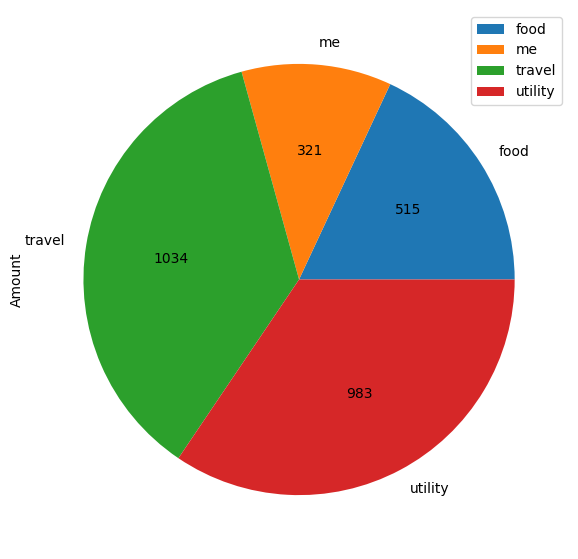

In [5]:
def absolute_value(val):
    return int(round(val / 100.0 * d["Amount"].sum()))


plt.figure(figsize=(7, 7))
d["Amount"].plot(kind="pie", autopct=absolute_value, legend=True)
plt.show()

## date wise

In [6]:
d = df[["Date", "Amount"]].groupby("Date").sum()
d

,Amount
Date,
2025-05-31,180
2025-06-02,250
2025-06-03,204
2025-06-04,451
2025-06-05,783
2025-06-06,266
2025-06-07,772
2025-06-08,144
2025-06-09,439


## plot


<Figure size 900x900 with 0 Axes>

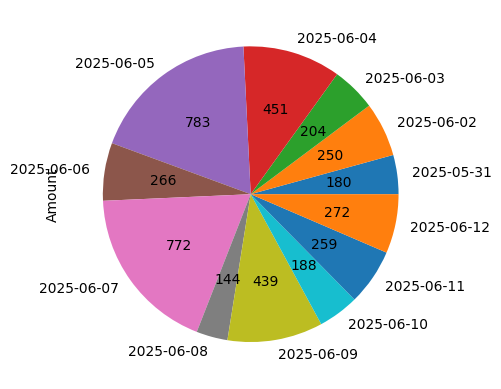

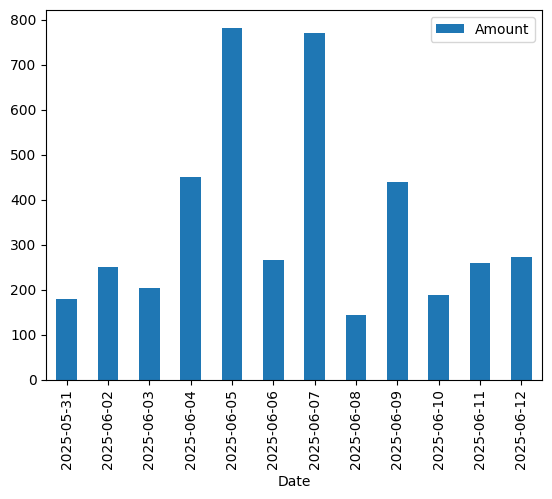

In [7]:
plt.figure(figsize=(9, 9))
try:
    d.plot(kind="pie", y="Amount", autopct=absolute_value, legend=False)
    d.plot(kind="bar")
except:
    pass

## owed

In [8]:
d = df[["Amount", "Split", "Not Me"]]
s = d[d["Not Me"] == 1]
d = d.drop(s.index)
sum1 = s["Amount"].sum()
sum2 = (d["Amount"] - (d["Amount"] / d["Split"])).sum()
print(sum1 + sum2)

1354.6666666666665


## No of refills ago

In [9]:
def no_of_refills_ago(n):
    df = pd.read_csv("expenses.csv")
    refill_index = df[df["Date"] == "Refill"].index[-(n)]
    try:
        refill_index2 = df[df["Date"] == "Refill"].index[-(n + 1)]
    except:
        refill_index2 = 0
    df = df.loc[refill_index2 + 1 : refill_index - 1]
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(float)
    df["Not Me"] = df["Not Me"].astype(int)
    return categorical(df)


e = no_of_refills_ago(1)
e

,Amount
Category,
food,483.0
travel,1205.0
utility,3832.0


## common items

In [10]:
import pandas as pd


def most_common_item():
    df = pd.read_csv("expenses.csv")
    a = df["Item"].value_counts()
    print(a)


most_common_item()

Item
milk          71
petrol        41
chocolate     33
vegetables    28
food          22
              ..
auto back      1
idli           1
to-gym         1
sugarcane      1
back-to-pg     1
Name: count, Length: 206, dtype: int64


# All time - starting sep 2022

In [11]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
y = df[df["Not Me"] == 0]
x = y["Amount"] / y["Split"]
86000 + x.sum()

np.float64(200271.5)

# Month Wise

In [12]:
import pandas as pd

df = pd.read_csv("expenses.csv")
df = df.drop(df[df["Date"] == "Refill"].index)
df["Amount"] = df["Amount"].astype(int)
df["Split"] = df["Split"].astype(float)
df["Not Me"] = df["Not Me"].astype(int)
df = df.drop(df[df["Not Me"] == 1].index)
df["Amount"] = df["Amount"] / df["Split"]
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
s = df.groupby(df["Date"].dt.month)
s = s["Amount"].sum()
s

Date
2     23840.000000
3     10078.000000
4     11198.500000
5     16796.000000
6      9472.833333
7      7773.000000
8      9305.166667
9      8535.500000
11    17272.500000
Name: Amount, dtype: float64